# Metodología de la Simulación

### 1. Identifique las variables

Aquellas cuyo comportamiento define el comportamiento o la evoución global del sistema real.

### 2. Determine la distribución de probabilidad

Elija el tipo de distribución de probabilidad que mejor defina el comportamiento aleatorio de cada una de las variables del sistema identificadas en el paso anterior.

### 3. Modele las variables aleatorias

Cosntruya un modelo fiel de la aleatoriedad de las variables del sistema. Simular el comportamiento del sistema implica generar muestras aleatorias de cada variable que sigan fielmente la distribución de probabilidad correspondiente.

### 4. Defina el modelo del sistema y los objetivos de la simulación

Fije los objetivos y diseñe un modelo del sistema real que abstraiga sus propiedades más relevantes. Todo error en el modelo (o su implementación computacional) puede dar lugar a conclusiones equivocadas.

Antes de experimentar con el modelo, asegurarse de que refleja fielmente el sistema real **validando** el mismo a partir de datos reales, para ello compare los resultados obtenidos de la simulación con los producidos por el sistema.

### 5. Diseñe el experimento

Diseñe un experimento así como las ejecuciones concretas del mismo, los escenarios que desea estudiar para alcanzar los objetivos fijados. El experimento consiste en generar valores de las variables cuyo comportamiento define el comportamiento del sistema y analizar este ante dichos valores.

### 6. Repita el experimento $n$ veces

Así dispondrá de $n$ observaciones sobre el comportamiento del sistema, lo que permitirá entender su funcionamiento así como evaluar el desempeño del mismo frente a los diversos escenarios establecidos.

El **método Monte Carlo** se basa en la **Ley Fuerte de los Grandes Números** y el **Teorema del Límite Central**.

## Ejemplo Método Monte Carlo Acierto y Error

Calculo de integrales de una variable por el Método Montecarlo de Acierto y Error. Consideren que los límites de integración vayan de 0 a 1

1. Analíticamente.
2. Mediante simulación.

Analiticamente:

**PASO 1**. Defina las variables que intervienen en el modelo.

Variable x

**PASO 2**. Formule la distribución de probabilidad de cada variable.

Utilizaremos una distribución uniforme para x. Es decir, f(x)=1 para 0<=x<=1 y f(x) =0 para x<0 y x>1


**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

F(x)=x para 0<=x<=1




**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

de [0, 1]


**PASO 5**. Genere números aleatorios.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def generar_numeros_aleatorios(n):
    return np.random.uniform(0, 1, n)



**PASO 6**. Simule un lanzamiento.

In [2]:
def calcular_integral(f, n):
    numeros_aleatorios = generar_numeros_aleatorios(n)
    integral = np.mean(f(numeros_aleatorios))
    return integral

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

In [4]:
def graficar_estabilizacion(integrales):
    plt.plot(range(1, len(integrales) + 1), integrales)
    plt.xlabel('Tamaño de la muestra')
    plt.ylabel('Valor de la integral')
    plt.title('Estabilización de la integral')
    plt.show()


**PASO 8**. Replique el modelo.

In [14]:
def replicar_modelo(f, num_replicas, n):
    integrales_replicas = []
    for _ in range(num_replicas):
        integral = calcular_integral(f, n)
        integrales_replicas.append(integral)
    return integrales_replicas

def funcion_a_integrar(x):
    return x

**PASO 9**. Calcule la probabilidad de que aparezcan dos caras lanzando tres veces una moneda al aire y su desviación estándar.

In [11]:
probabilidad = binom.pmf(2, 3, 0.5)
desviacion_estandar = np.sqrt(3 * 0.5 * 0.5)

**PASO 10**. Halle el intervalo de confianza de la probabilidad de queaparezcan dos caras lanzando tres veces una moneda al aire con un nivel de confianza del 95%.

In [10]:
intervalo_confianza = binom.interval(0.95, 3, 0.5)

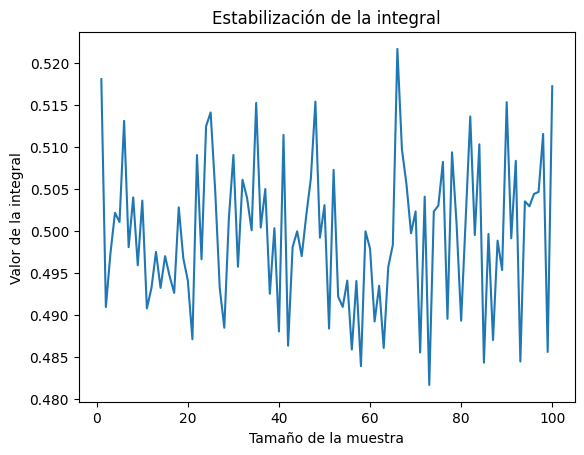

Probabilidad de obtener dos caras lanzando tres veces una moneda: 0.3750000000000001
Desviación estándar: 0.8660254037844386
Intervalo de confianza del 95% para la probabilidad: (0.0, 3.0)


In [12]:
if __name__ == "__main__":
    tamaño_muestra = 1000
    integrales = replicar_modelo(funcion_a_integrar, 100, tamaño_muestra)
    graficar_estabilizacion(integrales)

    print("Probabilidad de obtener dos caras lanzando tres veces una moneda:", probabilidad)
    print("Desviación estándar:", desviacion_estandar)


    print("Intervalo de confianza del 95% para la probabilidad:", intervalo_confianza)